In [1]:
import os
import numpy as np
import pandas as pd 
import cv2
import json
import skimage.io
import matplotlib.pyplot as plt
import albumentations as albu

In [2]:
DATA_PATH = './data'
MODELS_PATH = './models'
IMG_SIZE = 128
SEQ_LEN = 16
BATCH_SIZE = 4
MDL_VERSION = 'v0'
SEED = 80

In [3]:
train = pd.read_csv('{}/train.csv'.format(DATA_PATH))
print('train: ', train.shape, '| unique ids:', sum(train['isup_grade'].value_counts()))

train:  (10616, 4) | unique ids: 10616


In [4]:
aug = albu.Compose(
    [
        albu.OneOf([albu.RandomBrightness(limit=.15), albu.RandomContrast(limit=.3), albu.RandomGamma()], p=.25),
        albu.HorizontalFlip(p=.25),
        albu.VerticalFlip(p=.25),
        albu.ShiftScaleRotate(shift_limit=.1, scale_limit=.1, rotate_limit=20, p=.25)
    ]
)
def enhance_image(image, contrast=1, brightness=15):
    img_enhanced = cv2.addWeighted(image, contrast, image, 0, brightness)
    return img_enhanced
def get_axis_max_min(array, axis=0):
    one_axis = list((array != 255).sum(axis=tuple([x for x in (0, 1, 2) if x != axis])))
    axis_min = next((i for i, x in enumerate(one_axis) if x), 0)
    axis_max = len(one_axis) - next((i for i, x in enumerate(one_axis[::-1]) if x), 0)
    return axis_min, axis_max

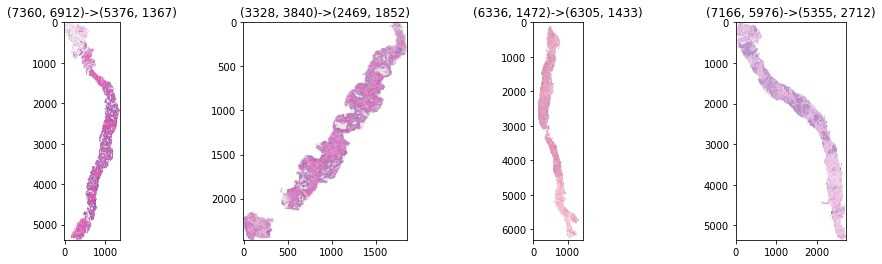

CPU times: user 3.7 s, sys: 208 ms, total: 3.9 s
Wall time: 3.27 s


In [8]:
%%time
imgs_path='{}/train_images'.format(DATA_PATH)
TO_SHOW = 4
TIFF = 1
RESIZE = 1
fig, axes = plt.subplots(figsize=(16, 4), ncols=TO_SHOW)
for j in range(TO_SHOW):
    img_path = '{}/{}.tiff'.format(imgs_path, train['image_id'][j])
    img = enhance_image(skimage.io.MultiImage(img_path)[TIFF])
    img = cv2.resize(img, (int(img.shape[1] / RESIZE), int(img.shape[0] / RESIZE)))
    a0min, a0max = get_axis_max_min(img, axis=0)
    a1min, a1max = get_axis_max_min(img, axis=1)
    img_cut = img[a0min:a0max, a1min:a1max, :]
    #img = aug(image=img)['image']
    axes[j].imshow(img_cut)
    axes[j].set_title(str(img.shape[:2]) + '->' + str(img_cut.shape[:2]))
plt.show()

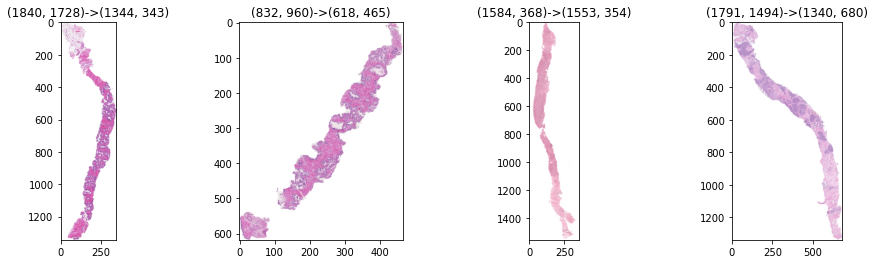

CPU times: user 512 ms, sys: 12 ms, total: 524 ms
Wall time: 492 ms


In [9]:
%%time
imgs_path='{}/train_images'.format(DATA_PATH)
TO_SHOW = 4
TIFF = -1
RESIZE = 1
fig, axes = plt.subplots(figsize=(16, 4), ncols=TO_SHOW)
for j in range(TO_SHOW):
    img_path = '{}/{}.tiff'.format(imgs_path, train['image_id'][j])
    img = enhance_image(skimage.io.MultiImage(img_path)[TIFF])
    img = cv2.resize(img, (int(img.shape[1] / RESIZE), int(img.shape[0] / RESIZE)))
    a0min, a0max = get_axis_max_min(img, axis=0)
    a1min, a1max = get_axis_max_min(img, axis=1)
    img_cut = img[a0min:a0max, a1min:a1max, :]
    #img = aug(image=img)['image']
    axes[j].imshow(img_cut)
    axes[j].set_title(str(img.shape[:2]) + '->' + str(img_cut.shape[:2]))
plt.show()

In [23]:
img_path = '{}/{}.tiff'.format(imgs_path, train['image_id'][j])

In [24]:
%timeit enhance_image(skimage.io.MultiImage(img_path)[1])

81.4 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
%timeit enhance_image(skimage.io.MultiImage(img_path)[2])

11.7 ms ± 216 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
